# LSTM con una variable

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_train_2015.csv', index_col=0, parse_dates=True)
df = df.asfreq('h')

In [ ]:
df = df.between_time('08:00:00','17:00:00')

In [ ]:
df

,SRGLOAVG1H,TAMAX1H,TAMIN1H,RHMAX1H,RHMIN1H,PRSUM1H,PAAVG1H,PAMAX1H,PAMIN1H,WS1HA,WS1HX,WD1HA
Local_Time,,,,,,,,,,,,
2015-01-01 08:00:00,107.0,12.2,9.5,96.0,89.0,0.0,743.5,743.7,743.1,2.5,4.6,42
2015-01-01 09:00:00,394.0,15.1,12.2,89.0,76.0,0.0,743.8,743.9,743.7,3.3,5.8,59
2015-01-01 10:00:00,728.0,18.1,15.1,79.0,57.0,0.0,743.7,743.9,743.4,4.4,8.4,40
2015-01-01 11:00:00,428.0,18.4,16.7,66.0,58.0,0.0,743.2,743.4,742.8,4.0,8.1,35
2015-01-01 12:00:00,403.0,18.5,17.2,65.0,55.0,0.0,742.6,742.9,742.3,3.5,7.6,34
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-07 13:00:00,370.0,18.0,14.2,84.0,63.0,0.2,744.3,744.8,744.1,4.5,11.1,30
2016-08-07 14:00:00,364.0,17.5,14.0,87.0,72.0,0.0,743.9,744.2,743.5,4.3,12.1,28
2016-08-07 15:00:00,331.0,18.0,15.3,81.0,64.0,0.0,743.4,743.6,743.0,3.3,11.0,23


In [ ]:
df = df[['SRGLOAVG1H','TAMAX1H','TAMIN1H','WS1HX','WS1HA','RHMIN1H','RHMAX1H']]

In [ ]:
df.head()

,SRGLOAVG1H,TAMAX1H,TAMIN1H,WS1HX,WS1HA,RHMIN1H,RHMAX1H
Local_Time,,,,,,,
2015-01-01 08:00:00,107.0,12.2,9.5,4.6,2.5,89.0,96.0
2015-01-01 09:00:00,394.0,15.1,12.2,5.8,3.3,76.0,89.0
2015-01-01 10:00:00,728.0,18.1,15.1,8.4,4.4,57.0,79.0
2015-01-01 11:00:00,428.0,18.4,16.7,8.1,4.0,58.0,66.0
2015-01-01 12:00:00,403.0,18.5,17.2,7.6,3.5,55.0,65.0


In [ ]:
df_test = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_test_2015.csv', index_col=0, parse_dates=True)
df_test = df_test.asfreq('h')

In [ ]:
df_test = df_test[['SRGLOAVG1H','TAMAX1H','TAMIN1H','WS1HX','WS1HA','RHMIN1H','RHMAX1H']]
df_test = df_test.between_time('08:00:00','17:00:00')

In [ ]:
df_test.head()

,SRGLOAVG1H,TAMAX1H,TAMIN1H,WS1HX,WS1HA,RHMIN1H,RHMAX1H
Local_Time,,,,,,,
2016-08-08 08:00:00,136.0,12.2,10.8,6.2,3.2,89.0,95.0
2016-08-08 09:00:00,337.0,15.2,12.3,7.8,3.4,73.0,90.0
2016-08-08 10:00:00,303.0,15.1,13.6,10.1,4.2,70.0,81.0
2016-08-08 11:00:00,549.0,16.5,13.3,9.6,4.8,71.0,88.0
2016-08-08 12:00:00,577.0,17.6,15.8,12.8,5.5,65.0,77.0


Se toma la serie de tiempo de la radiación solar global.

In [ ]:
RSG = df['SRGLOAVG1H'].values

In [ ]:
RSG = np.reshape(RSG,(-1,1))

In [ ]:
RSG[:5]

array([[107.],
       [394.],
       [728.],
       [428.],
       [403.]])

In [ ]:
RSG_test = df_test['SRGLOAVG1H'].values
RSG_test = np.reshape(RSG_test,(-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(RSG)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(RSG)
scaled_test = scaler.transform(RSG_test)

In [ ]:
scaled_train[0]

array([0.08036454])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

Se definen los batches para el entrenamiento.

In [ ]:
n_input = 12 # horas hacia atrás
n_features = 0 # variables exógenas
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]

In [ ]:
print(f'Datos: \n{X.flatten()}')
print(f'Predicción: \n {y}')

Datos: 
[0.08036454 0.31814416 0.5948633  0.34631317 0.32560066 0.57912179
 0.32062966 0.48384424 0.24689312 0.10439105 0.07207954 0.08947804]
Predicción: 
 [[0.17978459]]


## Creación del modelo

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features+1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Se puede observar que el error se estabiliza a partir de la séptima época

In [ ]:
# fit model
model.fit(generator,epochs=15)

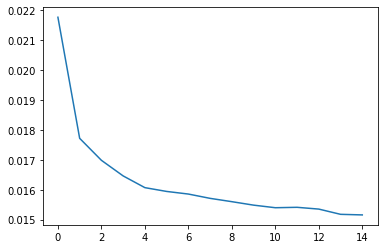

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
X.shape

(1, 12, 1)

In [ ]:
# Necesitaremos las últimas 12 horas del conjunto de entrenamiento para predecir la primera hora en el conjunto de prueba
first_eval_batch = scaled_train[-12:]

In [ ]:
first_eval_batch

array([[0.35211268],
       [0.14001657],
       [0.06130903],
       [0.11019056],
       [0.21789561],
       [0.46478873],
       [0.49047225],
       [0.29826015],
       [0.29328915],
       [0.26594863],
       [0.26843413],
       [0.10107705]])

In [ ]:
first_eval_batch.shape

(12, 1)

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features+1))

In [ ]:
first_eval_batch.shape

(1, 12, 1)

Valor predicho y valor real.

In [ ]:
model.predict(first_eval_batch)[0]

array([0.09088302], dtype=float32)

In [ ]:
scaled_test[0]

array([0.10439105])

Se obtienen predicciones para una semana

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features+1))

for i in range(12*7):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
df_plot = pd.DataFrame()

In [ ]:
df_plot['RSG'] =  df_test['SRGLOAVG1H'][:12*7]

In [ ]:
df_plot['predictions'] = true_predictions

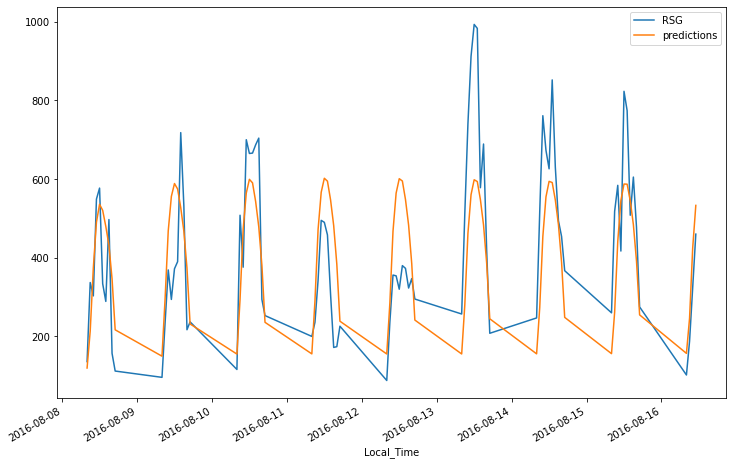

In [ ]:
df_plot.plot(figsize=(12,8))

Evaluación del modelo

In [ ]:
predictions = []

In [ ]:
for i in range(12,len(df_test)):
  model_input = scaled_test[i-12:i]
  model_input = model_input.reshape((1, n_input, n_features+1))
  predictions.append(model.predict(model_input)[0])

In [ ]:
predictions[:5]

[array([0.31834394], dtype=float32),
 array([0.37483808], dtype=float32),
 array([0.3302368], dtype=float32),
 array([0.34357017], dtype=float32),
 array([0.32537445], dtype=float32)]

In [ ]:
predictions = np.ndarray.flatten(np.array(predictions))

In [ ]:
len(predictions)

1448

In [ ]:
len(df_test)

1460

In [ ]:
predictions = predictions.reshape(-1,1)

In [ ]:
true_predictions = scaler.inverse_transform(predictions)

In [ ]:
true_predictions[:5]

array([[394.24115],
       [462.4296 ],
       [408.59583],
       [424.6892 ],
       [402.727  ]], dtype=float32)

In [ ]:
true_values = np.ndarray.flatten(df_test.iloc[12:]['SRGLOAVG1H'].values)

In [ ]:
len(true_values)

1448

In [ ]:
mean_squared_error(true_values,true_predictions)

27025.09416820293

Este modelo es mejor que AR.

In [ ]:
errorAR = 28497.249708788895
errorLSTM = 27025.09416820293
min(errorAR, errorLSTM)

27025.09416820293

In [ ]:
27025.09416820293**(1/2)

164.39310863963527

## Búsqueda de los mejores parámetros para el modelo

**Número de neuronas LSTM**

In [ ]:
def create_Model(n_input, LSTM_neurons = 100):
  # define model
  model = Sequential()
  model.add(LSTM(LSTM_neurons, activation='relu', input_shape=(n_input, n_features+1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [ ]:
resultados=[]

In [ ]:
for retrasos in range(20,21,2): #hasta dos días hacia el pasado
  for num_neuronas in range(90,111,10): 
    for batch_size in range(50,151,50): 
      if(num_neuronas==90 and batch_size==50):
        continue
      print('Retrasos:',retrasos,'Neuronas LSTM:',num_neuronas,'Batch size:',batch_size)
      n_input = retrasos # horas hacia atrás
      n_features = 0 # variables exógenas
      generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)  
      model = create_Model(n_input,LSTM_neurons=num_neuronas)
      model.fit(generator,epochs=7,verbose=False,batch_size=batch_size)
      predictions = []
      for j in range(n_input,len(df_test)):
        model_input = scaled_test[j-n_input:j]
        model_input = model_input.reshape((1, n_input, n_features+1))
        predictions.append(model.predict(model_input)[0])
      predictions = np.ndarray.flatten(np.array(predictions))  
      true_predictions = scaler.inverse_transform(np.reshape(predictions,(-1,1)))
      true_values = np.ndarray.flatten(df_test.iloc[n_input:]['SRGLOAVG1H'].values)
      errorMSE = mean_squared_error(true_values,true_predictions)
      errorMAE = mean_absolute_error(true_values,true_predictions)
      print('Error MSE:',errorMSE)
      print('Error MAE:',errorMAE)
      resultados.append({
          'Retrasos':retrasos,
          'Neuronas LSTM':num_neuronas,
          'Batch size':batch_size,
          'MSE':errorMSE,
          'MAE':errorMAE
      })

Retrasos: 20 Neuronas LSTM: 90 Batch size: 100
Error MSE: 26877.559049190633
Error MAE: 128.69858238365916
Retrasos: 20 Neuronas LSTM: 90 Batch size: 150
Error MSE: 26609.37996323424
Error MAE: 126.01490384207831
Retrasos: 20 Neuronas LSTM: 100 Batch size: 50
Error MSE: 27251.858716563776
Error MAE: 127.47600281503466
Retrasos: 20 Neuronas LSTM: 100 Batch size: 100
Error MSE: 26786.6210349321
Error MAE: 126.57109822962019
Retrasos: 20 Neuronas LSTM: 100 Batch size: 150
Error MSE: 26168.647785296016
Error MAE: 125.87532467312283
Retrasos: 20 Neuronas LSTM: 110 Batch size: 50
Error MSE: 27952.98730136871
Error MAE: 130.61344849533504
Retrasos: 20 Neuronas LSTM: 110 Batch size: 100
Error MSE: 36496.266288627696
Error MAE: 149.49385791102216
Retrasos: 20 Neuronas LSTM: 110 Batch size: 150
Error MSE: 33885.82507618015
Error MAE: 147.01261060502793


In [ ]:
resultados_anteriores = []

In [ ]:
import json

In [ ]:
with open("/content/resultadosv3.txt",'r') as fp:
    for line in fp:
      resultados_anteriores.append(json.loads(line))

In [ ]:
df_resultados_anteriores = pd.DataFrame(resultados_anteriores)

In [ ]:
df_resultados_anteriores.head()

,Retrasos,Neuronas LSTM,LSTM Layers,Batch size,MSE,MAE
0,22,75,3,50,190.050902,146.470509
1,22,75,1,100,163.295514,124.796200
2,22,75,2,100,163.555340,127.823501
3,22,75,3,100,183.151374,144.216852
4,22,75,1,150,165.208244,130.266097


In [ ]:
df_resultados.to_csv('lstm_resultados.csv',index=False)

In [ ]:
df_resultados = pd.read_csv('/content/lstm_resultados.csv')

In [ ]:
df_resultados['MSE'] = df_resultados['MSE']**(1/2)

In [ ]:
df_resultados = df_resultados.drop_duplicates()

In [ ]:
df_resultados.to_csv('./drive/MyDrive/DatosInvestigacion/lstm_resultados.csv',index=False)

In [ ]:
df_resultados =pd.read_csv('./drive/MyDrive/DatosInvestigacion/lstm_resultados.csv')

In [ ]:
df_resultados.shape

(27, 5)

In [ ]:
df_resultados

,Retrasos,Neuronas LSTM,Batch size,MSE,MAE
0,16,90,50,166.741125,130.207594
1,16,90,100,173.786730,134.334870
2,16,90,150,165.495836,127.464311
3,16,100,50,168.657395,133.450223
4,16,100,100,173.091175,134.888902
5,16,100,150,175.717733,138.574344
6,16,110,50,174.902869,137.403671
7,16,110,100,166.728868,129.427369
8,16,110,150,169.915982,133.568010
9,18,90,50,168.000173,130.162282


El mejor modelo es

In [ ]:
df_resultados[df_resultados['MSE'] == df_resultados['MSE'].min()]

,Retrasos,Neuronas LSTM,Batch size,MSE,MAE
23,20,100,150,161.767264,125.875325


In [ ]:
df_resultados[df_resultados['MAE'] == df_resultados['MAE'].min()]

,Retrasos,Neuronas LSTM,Batch size,MSE,MAE
23,20,100,150,161.767264,125.875325


## Más capas LSTM

In [ ]:
n_input=20
n_features=0

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features+1), return_sequences=True))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)  

In [ ]:
model.fit(generator,epochs=7,verbose=True,batch_size=100)

Epoch 1/7
5830/5830 [==============================] - 96s 16ms/step - loss: 0.0237
Epoch 2/7
5830/5830 [==============================] - 93s 16ms/step - loss: 0.0173
Epoch 3/7
5830/5830 [==============================] - 93s 16ms/step - loss: 0.0164
Epoch 4/7
5830/5830 [==============================] - 91s 16ms/step - loss: 0.0162
Epoch 5/7
5830/5830 [==============================] - 92s 16ms/step - loss: 0.0158
Epoch 6/7
5830/5830 [==============================] - 92s 16ms/step - loss: 0.0157
Epoch 7/7
5830/5830 [==============================] - 92s 16ms/step - loss: 0.0155


In [ ]:
model.fit(generator,epochs=1,verbose=True,batch_size=100)

5830/5830 [==============================] - 93s 16ms/step - loss: 0.0155


In [ ]:
predictions = []
for j in range(n_input,len(df_test)):
  model_input = scaled_test[j-n_input:j]
  model_input = model_input.reshape((1, n_input, n_features+1))
  predictions.append(model.predict(model_input)[0])
predictions = np.ndarray.flatten(np.array(predictions))  
true_predictions = scaler.inverse_transform(np.reshape(predictions,(-1,1)))
true_values = np.ndarray.flatten(df_test.iloc[n_input:]['SRGLOAVG1H'].values)
errorMSE = mean_squared_error(true_values,true_predictions)
errorMAE = mean_absolute_error(true_values,true_predictions)

In [ ]:
errorMSE**(1/2)

161.91662115290552

In [ ]:
errorMAE

127.53170172373454

## Grid search con varias LSTM layers

In [ ]:
def create_Model(n_input, LSTM_neurons = 100, layers=3,n_features=0):
  # define model
  model = Sequential()
  if(layers>1):
    model.add(LSTM(LSTM_neurons, activation='relu', input_shape=(n_input, n_features+1),return_sequences=True))
    for i in range(layers-2):
        model.add(LSTM(LSTM_neurons, activation='relu',return_sequences=True))
    model.add(LSTM(LSTM_neurons, activation='relu'))
  else:
    model.add(LSTM(LSTM_neurons, activation='relu', input_shape=(n_input, n_features+1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [ ]:
model = create_Model(10,100,4)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 10, 100)           80400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 282,101
Trainable params: 282,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
resultados=[]

In [ ]:
combinaciones_anteriores = []

In [ ]:
for i in range(len(df_resultados)):
  combinaciones_anteriores.append((int(df_resultados.iloc[i]['Retrasos']),
                                   int(df_resultados.iloc[i]['Neuronas LSTM']),
                                   int(df_resultados.iloc[i]['Batch size']),
                                   int(df_resultados.iloc[i]['LSTM Layers'])))

In [ ]:
len(combinaciones_anteriores)

118

In [ ]:
combinaciones_anteriores[117]

(24, 75, 50, 1)

In [ ]:
for retrasos in range(16,26,2): #hasta dos días y medio hacia el pasado
  for num_neuronas in range(50,101,25): 
    for batch_size in range(50,151,50):
      for num_layers in range(1,4): 
        if((retrasos,num_neuronas,batch_size,num_layers) in combinaciones_anteriores):
          continue
        n_input = retrasos # horas hacia atrás
        n_features = 0 # variables exógenas
        generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)  
        model = create_Model(n_input,LSTM_neurons=num_neuronas,layers=num_layers)
        model.fit(generator,epochs=7,verbose=False,batch_size=batch_size)
        predictions = []
        for j in range(n_input,len(df_test)):
          model_input = scaled_test[j-n_input:j]
          model_input = model_input.reshape((1, n_input, n_features+1))
          predictions.append(model.predict(model_input)[0])
        predictions = np.ndarray.flatten(np.array(predictions))  
        true_predictions = scaler.inverse_transform(np.reshape(predictions,(-1,1)))
        true_values = np.ndarray.flatten(df_test.iloc[n_input:]['SRGLOAVG1H'].values)
        errorMSE = mean_squared_error(true_values,true_predictions)
        errorMAE = mean_absolute_error(true_values,true_predictions)
        errorMSE = errorMSE**(1/2)
        print({
            'Retrasos':retrasos,
            'Neuronas LSTM':num_neuronas,
            'LSTM Layers': num_layers,
            'Batch size':batch_size,
            'MSE':errorMSE,
            'MAE':errorMAE
        })
        resultados.append({
            'Retrasos':retrasos,
            'Neuronas LSTM':num_neuronas,
            'LSTM Layers': num_layers,
            'Batch size':batch_size,
            'MSE':errorMSE,
            'MAE':errorMAE
        })

{'Retrasos': 24, 'Neuronas LSTM': 75, 'LSTM Layers': 2, 'Batch size': 50, 'MSE': 167.51080332535525, 'MAE': 129.81552468302522}
{'Retrasos': 24, 'Neuronas LSTM': 75, 'LSTM Layers': 3, 'Batch size': 50, 'MSE': 165.2425334490626, 'MAE': 129.2586303328405}
{'Retrasos': 24, 'Neuronas LSTM': 75, 'LSTM Layers': 1, 'Batch size': 100, 'MSE': 171.50340529031394, 'MAE': 134.18343077927912}
{'Retrasos': 24, 'Neuronas LSTM': 75, 'LSTM Layers': 2, 'Batch size': 100, 'MSE': 163.95792157731972, 'MAE': 128.5874683571393}
{'Retrasos': 24, 'Neuronas LSTM': 75, 'LSTM Layers': 3, 'Batch size': 100, 'MSE': 173.94728439236732, 'MAE': 137.49070211107684}
{'Retrasos': 24, 'Neuronas LSTM': 75, 'LSTM Layers': 1, 'Batch size': 150, 'MSE': 167.87887909684878, 'MAE': 131.17042675390218}
{'Retrasos': 24, 'Neuronas LSTM': 75, 'LSTM Layers': 2, 'Batch size': 150, 'MSE': 170.63486907302718, 'MAE': 130.11169611843184}
{'Retrasos': 24, 'Neuronas LSTM': 75, 'LSTM Layers': 3, 'Batch size': 150, 'MSE': 165.10533234090425, 

In [ ]:
resultados[0]

{'Batch size': 50,
 'LSTM Layers': 2,
 'MAE': 129.81552468302522,
 'MSE': 167.51080332535525,
 'Neuronas LSTM': 75,
 'Retrasos': 24}

In [ ]:
df_resultados_actuales = pd.DataFrame(resultados)

In [ ]:
df_resultados_actuales

,Retrasos,Neuronas LSTM,LSTM Layers,Batch size,MSE,MAE
0,24,75,2,50,167.510803,129.815525
1,24,75,3,50,165.242533,129.258630
2,24,75,1,100,171.503405,134.183431
3,24,75,2,100,163.957922,128.587468
4,24,75,3,100,173.947284,137.490702
5,24,75,1,150,167.878879,131.170427
6,24,75,2,150,170.634869,130.111696
7,24,75,3,150,165.105332,130.373765
8,24,100,1,50,172.405731,134.214063
9,24,100,2,50,163.376880,124.886940


In [ ]:
df_resultados.to_csv('./drive/MyDrive/DatosInvestigacion/lstm_layers_resultados.csv',index=False)

In [ ]:
df_resultados = pd.read_csv('./drive/MyDrive/DatosInvestigacion/lstm_layers_resultados.csv')

In [ ]:
df_resultados.shape

(135, 6)

In [ ]:
df_resultados = pd.concat([df_resultados,df_resultados_actuales],ignore_index=True)

In [ ]:
df_resultados

,Retrasos,Neuronas LSTM,Batch size,LSTM Layers,MSE,MAE
0,18,50,50,1,165.003338,128.963112
1,18,50,50,2,169.124247,129.228591
2,18,50,100,1,172.385838,134.206030
3,18,50,100,2,175.354043,134.069316
4,18,50,150,1,167.634067,131.444560
...,...,...,...,...,...,...
130,24,100,100,2,168.347869,130.685202
131,24,100,100,3,188.207351,147.408361
132,24,100,150,1,170.131866,132.751276
133,24,100,150,2,165.878109,127.872684


In [ ]:
df_resultados[df_resultados['MSE'] == df_resultados['MSE'].min()]

,Retrasos,Neuronas LSTM,Batch size,LSTM Layers,MSE,MAE
20,20,50,100,1,162.414028,126.5268


In [ ]:
df_resultados[df_resultados['MAE'] == df_resultados['MAE'].min()]

,Retrasos,Neuronas LSTM,Batch size,LSTM Layers,MSE,MAE
93,22,75,100,1,163.295514,124.7962


## Gráfico de error

### Retrasos

In [ ]:
import seaborn as sns

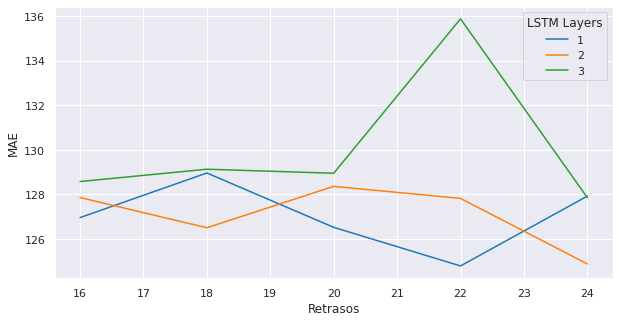

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_resultados, x='Retrasos', y='MAE',hue='LSTM Layers',palette='tab10',err_style="bars", ci=0, estimator=np.min)

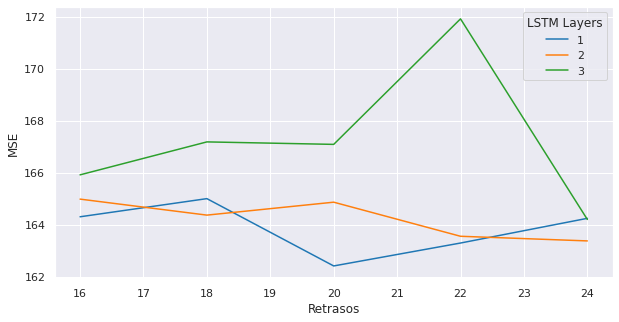

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_resultados, x='Retrasos', y='MSE',hue='LSTM Layers',palette='tab10',err_style="bars", ci=0, estimator=np.min)

### Número de neuronas

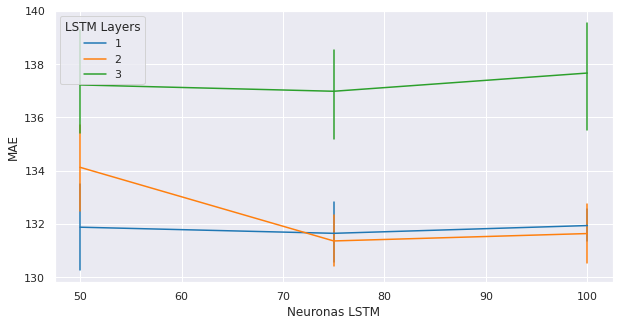

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_resultados, x='Neuronas LSTM', y='MAE',hue='LSTM Layers',palette='tab10',err_style="bars", ci=68)

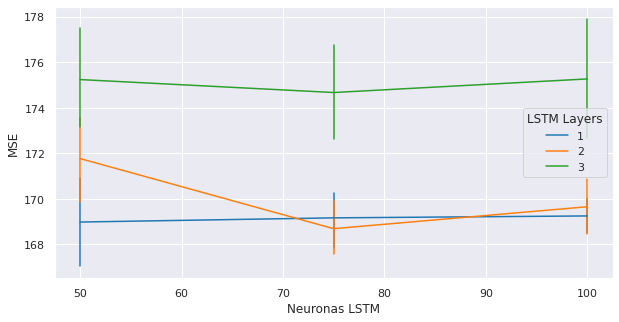

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_resultados, x='Neuronas LSTM', y='MSE',hue='LSTM Layers',palette='tab10',err_style="bars", ci=68)

### Batch size

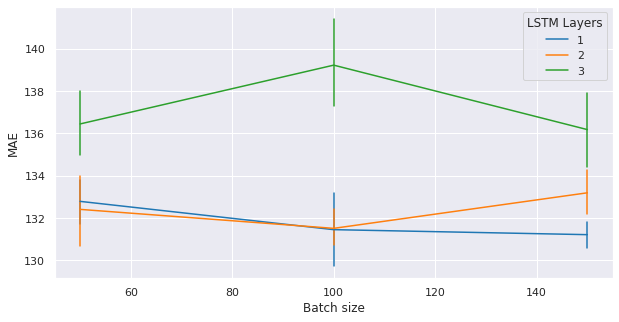

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_resultados, x='Batch size', y='MAE',hue='LSTM Layers',palette='tab10',err_style="bars", ci=68)

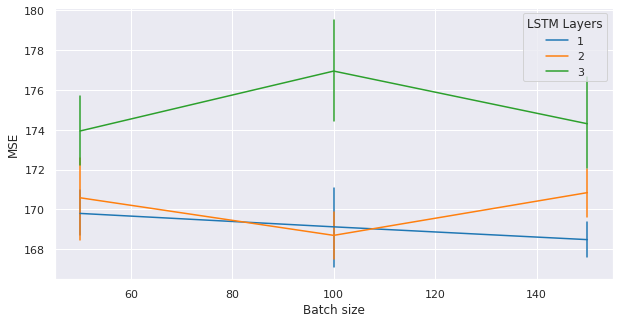

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_resultados, x='Batch size', y='MSE',hue='LSTM Layers',palette='tab10',err_style="bars", ci=68)

## Conclusiones

* El modelo que tiene 3 capas LSTM funciona peor que los otros dos.
* El mejor modelo debe tener 1 capa LSTM, pues los errores MSE y MAE se minimizan con ese valor.
* El mejor número de neuronas está entre 50 y 75, se elegirá 75 pues obtuvo el error MAE más pequeño y 50 neuronas puede ser muy simple.
* El batch size óptimo se encuentra en 100.
* El mejor número de retrasos está entre 20 y 22, se tomarán 22 retrasos para el mejor modelo, ya que el modelo AR también consideró que 22 retrasos era ideal.


## Probando el mejor modelo

In [ ]:
model = create_Model(22,75,1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75)                23100     
                                                                 
 dense (Dense)               (None, 1)                 76        
                                                                 
Total params: 23,176
Trainable params: 23,176
Non-trainable params: 0
_________________________________________________________________


In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=22, batch_size=1)  

In [ ]:
model.fit(generator,epochs=7,verbose=True,batch_size=100)

Epoch 1/7
5828/5828 [==============================] - 79s 13ms/step - loss: 0.0228
Epoch 2/7
5828/5828 [==============================] - 59s 10ms/step - loss: 0.0170
Epoch 3/7
5828/5828 [==============================] - 60s 10ms/step - loss: 0.0165
Epoch 4/7
5828/5828 [==============================] - 58s 10ms/step - loss: 0.0161
Epoch 5/7
5828/5828 [==============================] - 58s 10ms/step - loss: 0.0159
Epoch 6/7
5828/5828 [==============================] - 57s 10ms/step - loss: 0.0157
Epoch 7/7
5828/5828 [==============================] - 59s 10ms/step - loss: 0.0155


In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model('./drive/MyDrive/DatosInvestigacion/RSG_model.h5')

In [ ]:
n_input=22
n_features =0

In [ ]:
predictions = []
for j in range(n_input,len(df_test)):
  model_input = scaled_test[j-n_input:j]
  model_input = model_input.reshape((1, n_input, n_features+1))
  predictions.append(model.predict(model_input)[0])
predictions = np.ndarray.flatten(np.array(predictions))  
true_predictions = scaler.inverse_transform(np.reshape(predictions,(-1,1)))
true_values = np.ndarray.flatten(df_test.iloc[n_input:]['SRGLOAVG1H'].values)


In [ ]:
errorMSE = mean_squared_error(true_values,true_predictions)
errorMAE = mean_absolute_error(true_values,true_predictions)

In [ ]:
errorMAE

128.46700768610035

In [ ]:
errorMSE**(1/2)

164.04970448822036

In [ ]:
df_plot = pd.DataFrame({
    'True':true_values,
    'Prediction':true_predictions.flatten(),
})

Gráfico de los valores obtenidos

In [ ]:
df_plot = df_plot.set_index(df_test.iloc[n_input:].index)

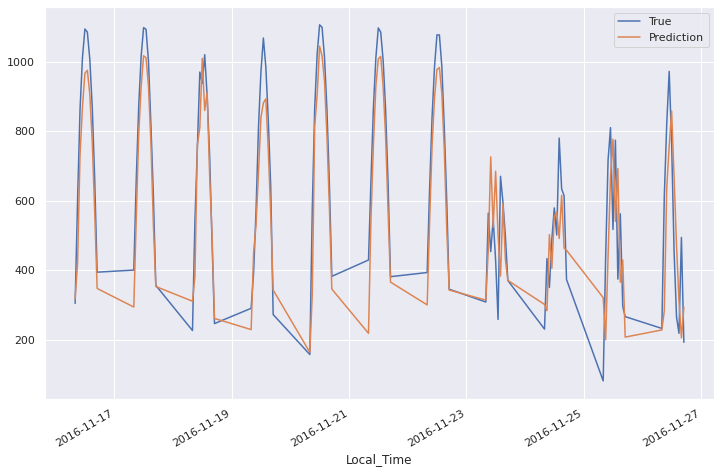

In [ ]:
df_plot['2016-11-16':'2016-11-26'].plot(figsize=(12,8))

Gráfico de los valores suavizados

In [ ]:
ventana = 20

In [ ]:
df_plot_2 = df_plot.copy()

In [ ]:
df_plot_2['SMA True'] = df_plot_2['True'].rolling(window=ventana).mean()

In [ ]:
df_plot_2['SMA Prediction'] = df_plot_2['Prediction'].rolling(window=ventana).mean()

In [ ]:
df_plot_2.head()

,True,Prediction,SMA True,SMA Prediction
Local_Time,,,,
2016-08-10 10:00:00,376.0,583.857544,NaN,NaN
2016-08-10 11:00:00,700.0,424.486420,NaN,NaN
2016-08-10 12:00:00,665.0,699.395508,NaN,NaN
2016-08-10 13:00:00,666.0,601.550171,NaN,NaN
2016-08-10 14:00:00,687.0,592.212158,NaN,NaN


In [ ]:
df_plot_2 = df_plot_2[['SMA True','SMA Prediction']]

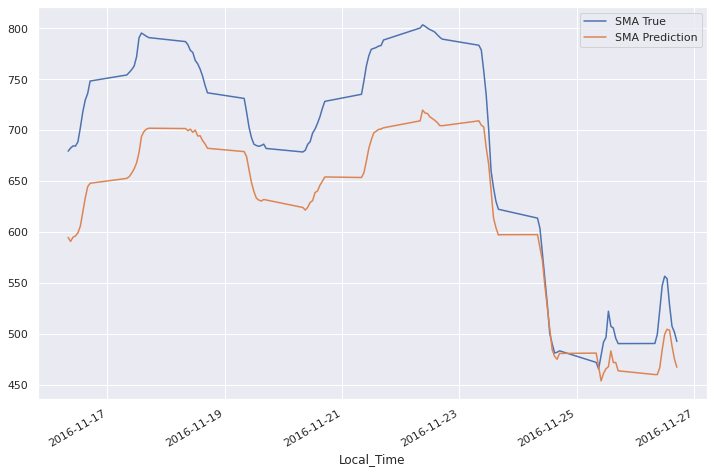

In [ ]:
df_plot_2['2016-11-16':'2016-11-26'].plot(figsize=(12,8))

In [ ]:
mean_absolute_error(df_plot_2.iloc[ventana:]['SMA True'],df_plot_2.iloc[ventana:]['SMA Prediction'])

37.88048082252147

In [ ]:
MSE = mean_squared_error(df_plot_2.iloc[ventana:]['SMA True'],df_plot_2.iloc[ventana:]['SMA Prediction'])
MSE**(1/2)

46.47948396263374

## Salvar el modelo

In [ ]:
model.save('./drive/MyDrive/DatosInvestigacion/RSG_model.h5')